In [56]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

pd.__version__

'0.23.4'

### 导入数据集

In [48]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [49]:
from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all,  random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_valid_scaled = scaler.transform(x_valid)

### 构建模型

In [51]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(1),
])
model.compile(loss='mean_squared_error', optimizer='adam')

In [37]:
history = model.fit(x_train_scaled, y_train, validation_data=(x_valid_scaled, y_valid), epochs=50)

Train on 11610 samples, validate on 3870 samples
Epoch 1/50
11610/11610 [==============================] - 2s 184us/sample - loss: 1.7370 - val_loss: 0.6975
Epoch 2/50
11610/11610 [==============================] - 1s 97us/sample - loss: 0.5873 - val_loss: 0.5504
Epoch 3/50
11610/11610 [==============================] - 1s 107us/sample - loss: 0.4719 - val_loss: 0.4599
Epoch 4/50
11610/11610 [==============================] - 1s 87us/sample - loss: 0.4224 - val_loss: 0.4303
Epoch 5/50
11610/11610 [==============================] - 1s 76us/sample - loss: 0.4007 - val_loss: 0.4081
Epoch 6/50
11610/11610 [==============================] - 1s 75us/sample - loss: 0.3894 - val_loss: 0.4028
Epoch 7/50
11610/11610 [==============================] - 1s 79us/sample - loss: 0.3812 - val_loss: 0.3938
Epoch 8/50
11610/11610 [==============================] - 1s 80us/sample - loss: 0.3757 - val_loss: 0.3879
Epoch 9/50
11610/11610 [==============================] - 1s 80us/sample - loss: 0.3713 - val

In [59]:
def plot_result(history):
    pd.DataFrame(history.history).plot(figsize = (8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

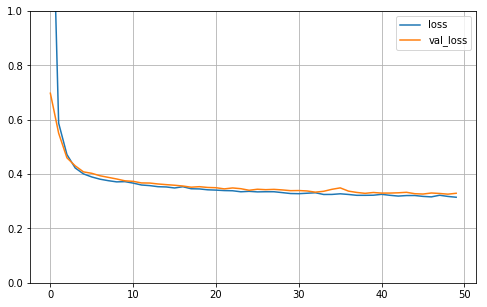

In [60]:
plot_result(history)